In this notebook, I want to compute the uncertainty of the phonon dispersion curves from the bootstrap ensembles.

In [1]:
from pathlib import Path
from datetime import datetime
from tqdm import tqdm
import sys

from ase import Atoms
from ase.calculators.kim import KIM
from ase.phonons import Phonons
from ase.visualize import view

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

WORK_DIR = Path().absolute()
sys.path.append(str(WORK_DIR.parent))

In [2]:
from energyvslatconst.energyvslatconst import energyvslatconst
from energyvslatconst.relaxation_latconst import equilibrate_graphene

In [3]:
# Read setting file
ROOT_DIR = WORK_DIR.parent
with open(ROOT_DIR / "settings.json", "r") as f:
    settings = json.load(f)
partition = settings["partition"]
RES_DIR = WORK_DIR / "results" / f"{partition}_partition"
if not RES_DIR.exists():
    RES_DIR.mkdir(parents=True)

In [4]:
# Graphene sheet
a0 = 2.466
cell = a0 * np.array([[1, 0, 0], [0.5, np.sqrt(3) / 2, 0], [0, 0, 10]])
positions = np.array([cell[0], 1 / 3 * cell[0] + 1 / 3 * cell[1]])
atoms = Atoms("2C", positions=positions, cell=cell, pbc=[1, 1, 1])
# view(atoms.repeat((4, 4, 1)))

In [5]:
energies = np.empty((0, 100, 6))
for ii in tqdm(range(100)):
    sample_dir = RES_DIR / f"{ii:03d}"
    modelname = f"DUNN_C_bootstrap_{ii:03d}"

    # Phonon calculator
    calc = KIM(modelname)
    ph = Phonons(
        atoms, calc, supercell=(8, 8, 1), delta=0.01, name=sample_dir / "phonon"
    )
    ph.run()

    # Read forces and assemble the dynamical matrix
    ph.read(acoustic=True)
    # ph.clean()

    path = atoms.cell.bandpath("GMKG", npoints=100)
    bs = ph.get_band_structure(path)
    energies = np.concatenate((energies, bs.energies), axis=0)

  1%|▋                                                                | 1/100 [00:13<22:22, 13.57s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.814e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.160e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.705e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.705e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.069e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.814e-04*i)


  2%|█▎                                                               | 2/100 [00:27<22:13, 13.61s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.631e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.762e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.648e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.719e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.687e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.631e-04*i)


  3%|█▉                                                               | 3/100 [00:40<21:59, 13.61s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.187e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.389e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.061e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.341e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.330e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.187e-04*i)


  4%|██▌                                                              | 4/100 [00:54<21:45, 13.60s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.769e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.498e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.586e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 2.022e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.323e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.532e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.395e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.769e-04*i)


  5%|███▎                                                             | 5/100 [01:07<21:28, 13.57s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.825e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.284e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.588e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.961e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.229e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.825e-04*i)


  6%|███▉                                                             | 6/100 [01:21<21:17, 13.59s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.152e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.153e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.333e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.117e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 6.813e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 8.223e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.115e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.108e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.991e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.152e-04*i)


  7%|████▌                                                            | 7/100 [01:35<21:05, 13.61s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.554e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.125e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.603e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.610e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.036e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.554e-04*i)


  8%|█████▏                                                           | 8/100 [01:48<20:52, 13.61s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.011e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.003e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.819e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.257e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.614e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.700e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.881e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.011e-04*i)


  9%|█████▊                                                           | 9/100 [02:02<20:39, 13.62s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.872e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.331e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.136e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.177e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.110e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.235e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.872e-04*i)


 10%|██████▍                                                         | 10/100 [02:16<20:23, 13.59s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.483e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.772e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.172e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 3.950e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.716e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.094e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.660e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.483e-04*i)


 11%|███████                                                         | 11/100 [02:29<20:12, 13.63s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.761e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.943e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.983e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.043e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.862e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.761e-04*i)


 12%|███████▋                                                        | 12/100 [02:43<19:57, 13.61s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.682e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.246e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.312e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.130e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.423e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.175e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.117e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.682e-04*i)


 13%|████████▎                                                       | 13/100 [02:56<19:40, 13.57s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.906e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.985e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.072e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.128e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.903e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.906e-04*i)


 14%|████████▉                                                       | 14/100 [03:10<19:25, 13.55s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.617e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.245e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.639e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.982e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.190e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.617e-04*i)


 15%|█████████▌                                                      | 15/100 [03:23<19:10, 13.54s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.574e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.088e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.204e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.098e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 6.433e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 7.909e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.097e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.984e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.928e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.574e-04*i)


 16%|██████████▏                                                     | 16/100 [03:37<18:56, 13.53s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.844e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.303e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.006e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.993e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.208e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.844e-04*i)


 17%|██████████▉                                                     | 17/100 [03:50<18:43, 13.54s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.241e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.656e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.983e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 3.841e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.580e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.907e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.547e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.241e-04*i)


 18%|███████████▌                                                    | 18/100 [04:04<18:28, 13.52s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.325e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.342e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.564e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.807e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.023e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.413e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.209e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.325e-04*i)


 19%|████████████▏                                                   | 19/100 [04:18<18:19, 13.57s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.460e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.112e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.143e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.065e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.460e-04*i)


 20%|████████████▊                                                   | 20/100 [04:31<18:06, 13.58s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.176e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.290e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.432e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.474e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.726e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.288e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.158e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.176e-04*i)


 21%|█████████████▍                                                  | 21/100 [04:45<17:58, 13.65s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.257e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.881e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.957e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.008e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.801e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.257e-04*i)


 22%|██████████████                                                  | 22/100 [04:58<17:42, 13.62s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.117e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.671e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.025e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 4.014e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.715e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.946e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.562e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.117e-04*i)


 23%|██████████████▋                                                 | 23/100 [05:12<17:30, 13.64s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.175e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.167e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.165e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.929e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.228e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.032e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.040e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.175e-04*i)


 24%|███████████████▎                                                | 24/100 [05:26<17:22, 13.71s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.837e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.639e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.128e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.258e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.569e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.837e-04*i)


 25%|████████████████                                                | 25/100 [05:40<17:17, 13.83s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.046e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.538e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.064e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.041e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 3.016e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.135e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.886e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.397e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.046e-04*i)


 26%|████████████████▋                                               | 26/100 [05:54<17:04, 13.85s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.615e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.173e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.193e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.042e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.325e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.057e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.046e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.615e-04*i)


 27%|█████████████████▎                                              | 27/100 [06:08<16:43, 13.75s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.160e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.160e-04*i)


 28%|█████████████████▉                                              | 28/100 [06:21<16:24, 13.67s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.617e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.312e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.790e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.115e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.255e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.617e-04*i)


 29%|██████████████████▌                                             | 29/100 [06:35<16:07, 13.63s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.782e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.398e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.249e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.875e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.221e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.299e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.782e-04*i)


 30%|███████████████████▏                                            | 30/100 [06:48<15:51, 13.60s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.336e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.808e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.623e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.709e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.732e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.336e-04*i)


 31%|███████████████████▊                                            | 31/100 [07:02<15:38, 13.60s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.983e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.568e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.048e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.725e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.874e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.878e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.427e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.983e-04*i)


 32%|████████████████████▍                                           | 32/100 [07:15<15:23, 13.59s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.375e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.403e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.233e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.209e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.305e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.375e-04*i)


 33%|█████████████████████                                           | 33/100 [07:29<15:09, 13.57s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.265e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.024e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.878e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.433e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.766e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.755e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.902e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.265e-04*i)


 34%|█████████████████████▊                                          | 34/100 [07:42<14:55, 13.57s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.588e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.811e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.660e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.741e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.734e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.588e-04*i)


 35%|██████████████████████▍                                         | 35/100 [07:56<14:43, 13.59s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.027e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.927e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.060e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.105e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.845e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.027e-04*i)


 36%|███████████████████████                                         | 36/100 [08:10<14:31, 13.61s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.843e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.409e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.946e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.246e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.049e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.121e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.235e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.692e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.238e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.843e-05*i)


 37%|███████████████████████▋                                        | 37/100 [08:23<14:19, 13.64s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.606e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.378e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.203e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.445e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.319e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.606e-04*i)


 38%|████████████████████████▎                                       | 38/100 [08:37<14:03, 13.60s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.701e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.386e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.655e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.971e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.176e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.500e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.251e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.701e-04*i)


 39%|████████████████████████▉                                       | 39/100 [08:50<13:48, 13.58s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.743e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.264e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.494e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.890e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.210e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.743e-04*i)


 40%|█████████████████████████▌                                      | 40/100 [09:04<13:35, 13.59s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.281e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.136e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.140e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.281e-04*i)


 41%|██████████████████████████▏                                     | 41/100 [09:18<13:20, 13.57s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.409e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.264e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.897e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.891e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.170e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.409e-04*i)


 42%|██████████████████████████▉                                     | 42/100 [09:31<13:08, 13.59s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.856e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.311e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.529e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.863e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.060e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.377e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.178e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.856e-04*i)


 43%|███████████████████████████▌                                    | 43/100 [09:45<12:56, 13.63s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.670e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.170e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.206e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.155e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.417e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.068e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.042e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.670e-04*i)


 44%|████████████████████████████▏                                   | 44/100 [09:59<12:44, 13.65s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.996e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.377e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.001e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.291e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.318e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.996e-04*i)


 45%|████████████████████████████▊                                   | 45/100 [10:12<12:34, 13.72s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.452e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.452e-04*i)


 46%|█████████████████████████████▍                                  | 46/100 [10:26<12:22, 13.75s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.922e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.070e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.824e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.024e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.922e-04*i)


 47%|██████████████████████████████                                  | 47/100 [10:40<12:10, 13.78s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.026e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.836e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.363e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 4.758e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.351e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.272e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.721e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.026e-04*i)


 48%|██████████████████████████████▋                                 | 48/100 [10:54<11:53, 13.73s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.126e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.982e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.523e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.938e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.126e-04*i)


 49%|███████████████████████████████▎                                | 49/100 [11:07<11:37, 13.68s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.705e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.876e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.864e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.928e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.797e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.705e-04*i)


 50%|████████████████████████████████                                | 50/100 [11:21<11:26, 13.73s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.230e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.593e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.062e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.191e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.524e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.230e-04*i)


 51%|████████████████████████████████▋                               | 51/100 [11:35<11:11, 13.70s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.375e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.697e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.426e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.771e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 3.359e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 5.696e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.811e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.232e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.551e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.375e-04*i)


 52%|█████████████████████████████████▎                              | 52/100 [11:48<10:55, 13.66s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.765e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.533e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.593e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.895e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.915e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.545e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.429e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.765e-04*i)


 53%|█████████████████████████████████▉                              | 53/100 [12:02<10:40, 13.62s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.565e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.387e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.682e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.115e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.298e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.524e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.252e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.565e-04*i)


 54%|██████████████████████████████████▌                             | 54/100 [12:15<10:24, 13.58s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.150e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.150e-04*i)


 55%|███████████████████████████████████▏                            | 55/100 [12:29<10:12, 13.60s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.703e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.470e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.899e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.667e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.794e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.729e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.331e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.703e-04*i)


 56%|███████████████████████████████████▊                            | 56/100 [12:43<09:57, 13.57s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.088e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.394e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.284e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.686e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.250e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.296e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.088e-04*i)


 57%|████████████████████████████████████▍                           | 57/100 [12:56<09:42, 13.56s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.659e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.053e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.395e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.418e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.967e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.659e-04*i)


 58%|█████████████████████████████████████                           | 58/100 [13:10<09:28, 13.54s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.343e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.236e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.738e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.750e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.144e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.343e-04*i)


 59%|█████████████████████████████████████▊                          | 59/100 [13:23<09:14, 13.53s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.494e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.494e-04*i)


 60%|██████████████████████████████████████▍                         | 60/100 [13:37<09:02, 13.55s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.356e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.326e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.317e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.356e-04*i)


 61%|███████████████████████████████████████                         | 61/100 [13:50<08:48, 13.55s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.231e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.580e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.556e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.231e-04*i)


 62%|███████████████████████████████████████▋                        | 62/100 [14:04<08:34, 13.54s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.700e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.965e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.939e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.049e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 4.909e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 6.800e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.051e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.729e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.810e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.700e-04*i)


 63%|████████████████████████████████████████▎                       | 63/100 [14:17<08:20, 13.53s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.567e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.992e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.742e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 5.847e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.276e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.630e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.871e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.567e-04*i)


 64%|████████████████████████████████████████▉                       | 64/100 [14:31<08:06, 13.52s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.090e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.779e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.226e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 4.335e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.003e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.141e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.666e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.090e-04*i)


 65%|█████████████████████████████████████████▌                      | 65/100 [14:44<07:52, 13.51s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.076e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.658e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.283e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.312e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 3.357e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.404e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.099e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.513e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.076e-04*i)


 66%|██████████████████████████████████████████▏                     | 66/100 [14:58<07:41, 13.58s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.580e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.425e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.425e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.633e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.364e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.580e-04*i)


 67%|██████████████████████████████████████████▉                     | 67/100 [15:12<07:28, 13.59s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.031e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.031e-04*i)


 68%|███████████████████████████████████████████▌                    | 68/100 [15:25<07:14, 13.56s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.736e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.258e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.632e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.193e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 9.470e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.032e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.185e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.389e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.092e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.736e-04*i)


 69%|████████████████████████████████████████████▏                   | 69/100 [15:39<07:00, 13.55s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.455e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.405e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.271e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.129e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.242e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.306e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.455e-04*i)


 70%|████████████████████████████████████████████▊                   | 70/100 [15:52<06:47, 13.58s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.091e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.295e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.013e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.997e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.200e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.091e-04*i)


 71%|█████████████████████████████████████████████▍                  | 71/100 [16:06<06:33, 13.56s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.323e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.319e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.464e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.410e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.682e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.322e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.187e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.323e-04*i)


 72%|██████████████████████████████████████████████                  | 72/100 [16:19<06:19, 13.54s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.665e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.512e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.583e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.782e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.448e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.665e-04*i)


 73%|██████████████████████████████████████████████▋                 | 73/100 [16:33<06:05, 13.53s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.254e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.587e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.125e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.996e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.316e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.111e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.948e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.445e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.254e-04*i)


 74%|███████████████████████████████████████████████▎                | 74/100 [16:46<05:53, 13.58s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.508e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.704e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.305e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.420e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.632e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.508e-04*i)


 75%|████████████████████████████████████████████████                | 75/100 [17:00<05:38, 13.55s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.314e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.583e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.757e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 2.588e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.698e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.696e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.477e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.314e-04*i)


 76%|████████████████████████████████████████████████▋               | 76/100 [17:13<05:24, 13.53s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.741e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.556e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.778e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.951e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.490e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.741e-04*i)


 77%|█████████████████████████████████████████████████▎              | 77/100 [17:27<05:11, 13.55s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.869e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.816e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.699e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.776e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.739e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.869e-04*i)


 78%|█████████████████████████████████████████████████▉              | 78/100 [17:41<04:58, 13.55s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.570e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.663e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.981e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 3.725e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.500e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.906e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.554e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.570e-04*i)


 79%|██████████████████████████████████████████████████▌             | 79/100 [17:54<04:44, 13.56s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.511e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.768e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.224e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 4.457e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.091e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.137e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.656e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.511e-04*i)


 80%|███████████████████████████████████████████████████▏            | 80/100 [18:08<04:30, 13.55s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.529e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.663e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.986e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 3.772e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.533e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.911e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.554e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.529e-04*i)


 81%|███████████████████████████████████████████████████▊            | 81/100 [18:21<04:17, 13.53s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.188e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.305e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.523e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.877e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.070e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.370e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.172e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.188e-04*i)


 82%|████████████████████████████████████████████████████▍           | 82/100 [18:35<04:03, 13.52s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.656e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.243e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.571e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.934e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.189e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.656e-04*i)


 83%|█████████████████████████████████████████████████████           | 83/100 [18:48<03:49, 13.52s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.450e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.556e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.068e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.926e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.139e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.042e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.892e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.415e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.450e-04*i)


 84%|█████████████████████████████████████████████████████▊          | 84/100 [19:02<03:36, 13.52s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.877e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.964e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.704e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 5.862e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.278e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.592e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.844e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.877e-04*i)


 85%|██████████████████████████████████████████████████████▍         | 85/100 [19:15<03:22, 13.51s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.068e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.479e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.615e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.799e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.416e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.068e-04*i)


 86%|███████████████████████████████████████████████████████         | 86/100 [19:29<03:09, 13.57s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.807e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.020e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.070e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.077e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 6.025e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 7.576e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.077e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.853e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.862e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.807e-04*i)


 87%|███████████████████████████████████████████████████████▋        | 87/100 [19:43<02:56, 13.58s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.524e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.785e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.587e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.971e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 3.586e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 5.886e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.001e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.389e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.636e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.524e-04*i)


 88%|████████████████████████████████████████████████████████▎       | 88/100 [19:56<02:42, 13.56s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.769e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.469e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.501e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.234e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.949e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.453e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.367e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.769e-04*i)


 89%|████████████████████████████████████████████████████████▉       | 89/100 [20:10<02:29, 13.56s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.196e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.307e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.991e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.981e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.212e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.196e-04*i)


 90%|█████████████████████████████████████████████████████████▌      | 90/100 [20:23<02:15, 13.55s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.509e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.043e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.343e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.371e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.957e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.509e-04*i)


 91%|██████████████████████████████████████████████████████████▏     | 91/100 [20:37<02:01, 13.54s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.578e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.332e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.040e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.306e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.275e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.578e-04*i)


 92%|██████████████████████████████████████████████████████████▉     | 92/100 [20:50<01:48, 13.56s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.312e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.216e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.284e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.221e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.489e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.145e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.087e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.312e-04*i)


 93%|███████████████████████████████████████████████████████████▌    | 93/100 [21:04<01:34, 13.54s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.659e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.659e-04*i)


 94%|████████████████████████████████████████████████████████████▏   | 94/100 [21:17<01:21, 13.53s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.156e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.968e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.944e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.050e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 4.909e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 6.802e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.052e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.734e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.813e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.156e-04*i)


 95%|████████████████████████████████████████████████████████████▊   | 95/100 [21:31<01:07, 13.55s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.568e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.990e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.251e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.281e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.906e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.568e-04*i)


 96%|█████████████████████████████████████████████████████████████▍  | 96/100 [21:44<00:54, 13.54s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.294e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.377e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 5.220e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.157e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.192e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.279e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.294e-04*i)


 97%|██████████████████████████████████████████████████████████████  | 97/100 [21:58<00:40, 13.53s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.147e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.709e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.121e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 4.354e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.986e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.037e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.598e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.147e-04*i)


 98%|██████████████████████████████████████████████████████████████▋ | 98/100 [22:11<00:27, 13.52s/it]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.355e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.072e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.435e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.456e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.985e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.355e-04*i)


 99%|███████████████████████████████████████████████████████████████▎| 99/100 [22:25<00:13, 13.51s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.082e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.527e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.972e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 8.627e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.778e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.803e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.387e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.082e-04*i)


100%|███████████████████████████████████████████████████████████████| 100/100 [22:38<00:00, 13.59s/it]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.587e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.067e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.477e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.022e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.587e-04*i)


In [6]:
# Convert to THz
conversion = 4.136e-3 # 1 Thz = 4.136 meV
energies /= conversion

labels = bs.get_labels()
mean_energies = np.mean(energies, axis=0)
error_energies = np.std(energies, axis=0)

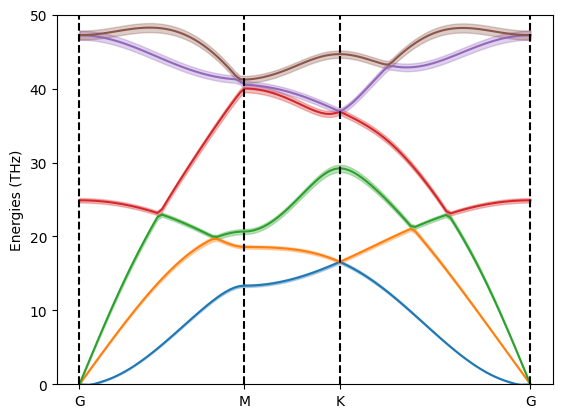

In [7]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]

plt.figure()
for ii, eng in enumerate(mean_energies.T):
    plt.fill_between(
        labels[0],
        eng - error_energies[:, ii],
        eng + error_energies[:, ii],
        color=colors[ii],
        alpha=0.3,
    )
    plt.plot(labels[0], eng, c=colors[ii])

for xcoord, name in zip(labels[1], labels[2]):
    plt.axvline(xcoord, c="k", ls="--")
plt.xticks(labels[1], labels[2])
plt.ylim(0, 50)
plt.ylabel("Energies (THz)")
plt.show()